In [2]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import plotly
import plotly.express as px
import seaborn as sns

%matplotlib inline

In [3]:
df2 = pd.read_excel('../data/FY2010_20_Active_Component_Accessions_Non_PriorSvc_Census_Region_v2.xlsx', nrows=153)

In [4]:
df2.head()

,division,Year(FY),DoD_Male,DoD_Male_Percentage,DoD_Female,DoD_Female_Percentage,DoD_Total,DoD_Total_Mil,DoD_Total_Percentage,GDP_Per_Capita,Civilian_Male_Percentage,Civilian_Female_Percentage,Civilian_Total,Civilian_Total_Mil,Civilian_Total_Percentage
0,NORTHEAST REGION,2010,16768,12.9,3139,12.1,19907,0.019907,12.7,57074.685716,18.2,18.3,NaN,NaN,18.2
1,New England Division,2010,4544,3.5,705,2.7,5249,0.005249,3.4,58038.261498,4.7,4.7,NaN,NaN,4.7
2,Middle Atlantic Division,2010,12224,9.4,2434,9.4,14658,0.014658,9.4,56733.873756,13.5,13.6,NaN,NaN,13.6
3,MIDWEST REGION,2010,27041,20.8,4601,17.7,31642,0.031642,20.2,45776.871746,22.4,22.3,NaN,NaN,22.3
4,East North Central Division,2010,18686,14.3,3221,12.4,21907,0.021907,14.0,45133.884500,15.6,15.6,NaN,NaN,15.6


In [6]:
df2[df2['division'].str.contains('Division')]

,division,Year(FY),DoD_Male,DoD_Male_Percentage,DoD_Female,DoD_Female_Percentage,DoD_Total,DoD_Total_Mil,DoD_Total_Percentage,GDP_Per_Capita,Civilian_Male_Percentage,Civilian_Female_Percentage,Civilian_Total,Civilian_Total_Mil,Civilian_Total_Percentage
1,New England Division,2010,4544,3.500000,705,2.700000,5249,0.005249,3.400000,58038.261498,4.70,4.70,NaN,NaN,4.70
2,Middle Atlantic Division,2010,12224,9.400000,2434,9.400000,14658,0.014658,9.400000,56733.873756,13.50,13.60,NaN,NaN,13.60
4,East North Central Division,2010,18686,14.300000,3221,12.400000,21907,0.021907,14.000000,45133.884500,15.60,15.60,NaN,NaN,15.60
5,West North Central Division,2010,8355,6.400000,1380,5.300000,9735,0.009735,6.200000,47230.832847,6.70,6.70,NaN,NaN,6.70
7,South Atlantic Division,2010,29203,22.400000,6973,26.800000,36176,0.036176,23.100000,45427.140521,17.80,17.90,NaN,NaN,17.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,South Atlantic Division,2020,28603,24.145499,8036,28.602954,36639,0.036639,25.000000,58724.964036,18.30,19.02,NaN,NaN,18.66
145,East South Central Division,2020,7680,6.483146,1719,6.118526,9399,0.009399,6.413248,49217.066650,5.78,6.27,NaN,NaN,6.02
146,West South Central Division,2020,18056,15.240000,4319,15.372842,22375,0.022375,15.267202,60305.367844,12.83,13.33,NaN,NaN,10.08
148,Mountain Division,2020,9680,8.171466,2332,8.300409,12012,0.012012,8.196184,57141.732470,8.42,7.43,NaN,NaN,7.93


In [10]:
df2_div = df2[df2['division'].str.contains('Division')]

In [11]:
df2_div.head(2)

,division,Year(FY),DoD_Male,DoD_Male_Percentage,DoD_Female,DoD_Female_Percentage,DoD_Total,DoD_Total_Mil,DoD_Total_Percentage,GDP_Per_Capita,Civilian_Male_Percentage,Civilian_Female_Percentage,Civilian_Total,Civilian_Total_Mil,Civilian_Total_Percentage
1,New England Division,2010,4544,3.5,705,2.7,5249,0.005249,3.4,58038.261498,4.7,4.7,NaN,NaN,4.7
2,Middle Atlantic Division,2010,12224,9.4,2434,9.4,14658,0.014658,9.4,56733.873756,13.5,13.6,NaN,NaN,13.6


In [12]:
df2_div.loc[df2_div['Year(FY)'] == 2010]

,division,Year(FY),DoD_Male,DoD_Male_Percentage,DoD_Female,DoD_Female_Percentage,DoD_Total,DoD_Total_Mil,DoD_Total_Percentage,GDP_Per_Capita,Civilian_Male_Percentage,Civilian_Female_Percentage,Civilian_Total,Civilian_Total_Mil,Civilian_Total_Percentage
1,New England Division,2010,4544,3.5,705,2.7,5249,0.005249,3.4,58038.261498,4.7,4.7,NaN,NaN,4.7
2,Middle Atlantic Division,2010,12224,9.4,2434,9.4,14658,0.014658,9.4,56733.873756,13.5,13.6,NaN,NaN,13.6
4,East North Central Division,2010,18686,14.3,3221,12.4,21907,0.021907,14.0,45133.884500,15.6,15.6,NaN,NaN,15.6
5,West North Central Division,2010,8355,6.4,1380,5.3,9735,0.009735,6.2,47230.832847,6.7,6.7,NaN,NaN,6.7
7,South Atlantic Division,2010,29203,22.4,6973,26.8,36176,0.036176,23.1,45427.140521,17.8,17.9,NaN,NaN,17.8
8,East South Central Division,2010,8251,6.3,1661,6.4,9912,0.009912,6.3,37669.166778,6.2,5.7,NaN,NaN,5.9
9,West South Central Division,2010,18047,13.9,3675,14.1,21722,0.021722,13.9,47357.037342,11.7,12.3,NaN,NaN,12.0
11,Mountain Division,2010,10683,8.2,2023,7.8,12706,0.012706,8.1,43800.012213,7.2,7.1,NaN,NaN,7.2
12,Pacific Division,2010,20281,15.6,3943,15.2,24224,0.024224,15.5,52101.402935,16.6,16.4,NaN,NaN,16.5


In [13]:
df2_div_2010 = df2_div.loc[df2_div['Year(FY)'] == 2010]

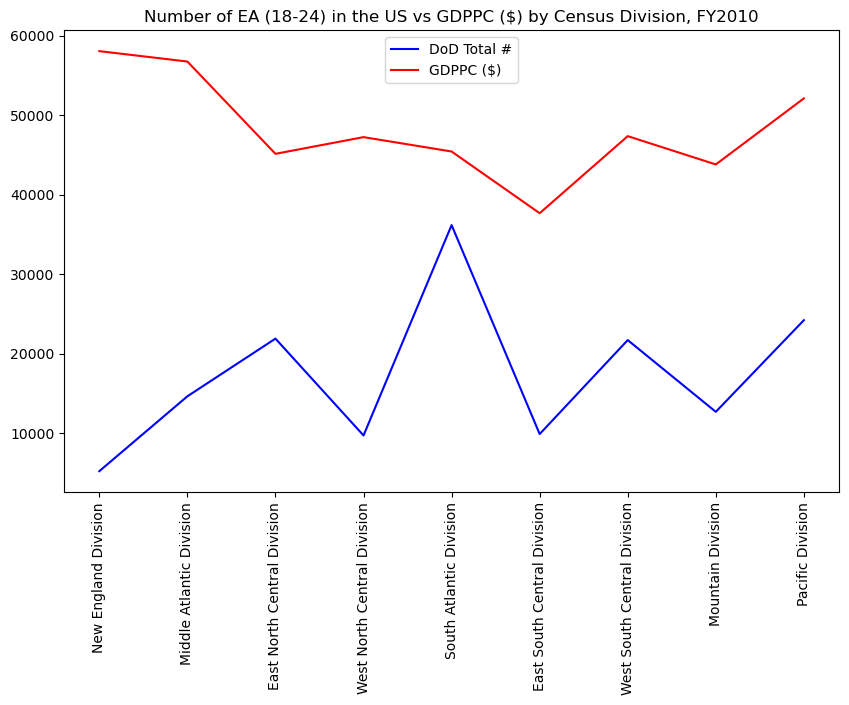

In [25]:
plt.figure(figsize=(10,6))

plt.plot(df2_div_2010['division'], df2_div_2010['DoD_Total'], label = 'DoD Total #', color = 'blue')
plt.plot(df2_div_2010['division'], df2_div_2010['GDP_Per_Capita'], label = 'GDPPC ($)', color = 'red')

#plt.ylim(100000, 900000)

plt.title('Number of EA (18-24) in the US vs GDPPC ($) by Census Division, FY2010')
plt.xticks(rotation=90)
plt.legend(loc='upper center')
plt.show()

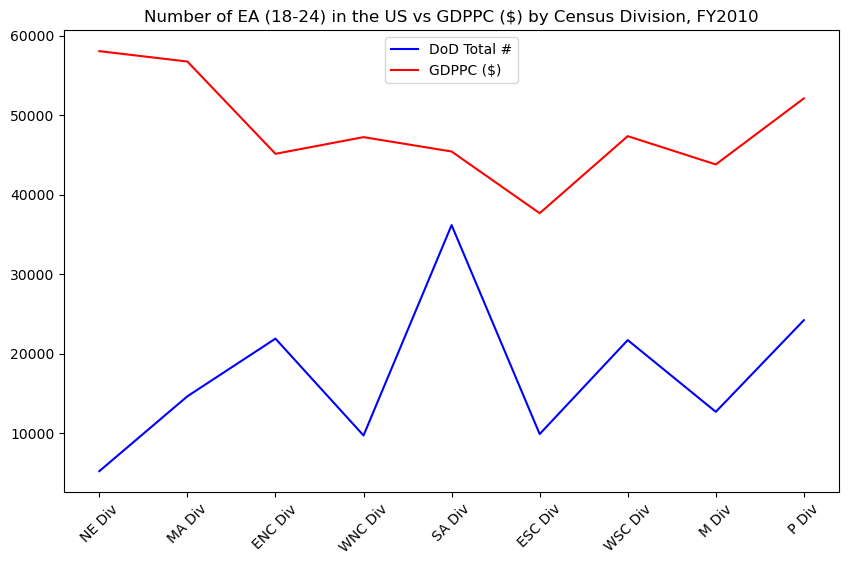

In [27]:
plt.figure(figsize=(10,6))
x = ['NE Div', 'MA Div', 'ENC Div', 'WNC Div', 'SA Div', 'ESC Div', 'WSC Div', 'M Div', 'P Div']
plt.plot(x, df2_div_2010['DoD_Total'], label = 'DoD Total #', color = 'blue')
plt.plot(x, df2_div_2010['GDP_Per_Capita'], label = 'GDPPC ($)', color = 'red')

#plt.ylim(100000, 900000)

plt.title('Number of EA (18-24) in the US vs GDPPC ($) by Census Division, FY2010')
plt.xticks(x, rotation=45)
plt.legend(loc='upper center')
plt.show()

In [30]:
import matplotlib.colors as mcolors

NameError: name 'y' is not defined

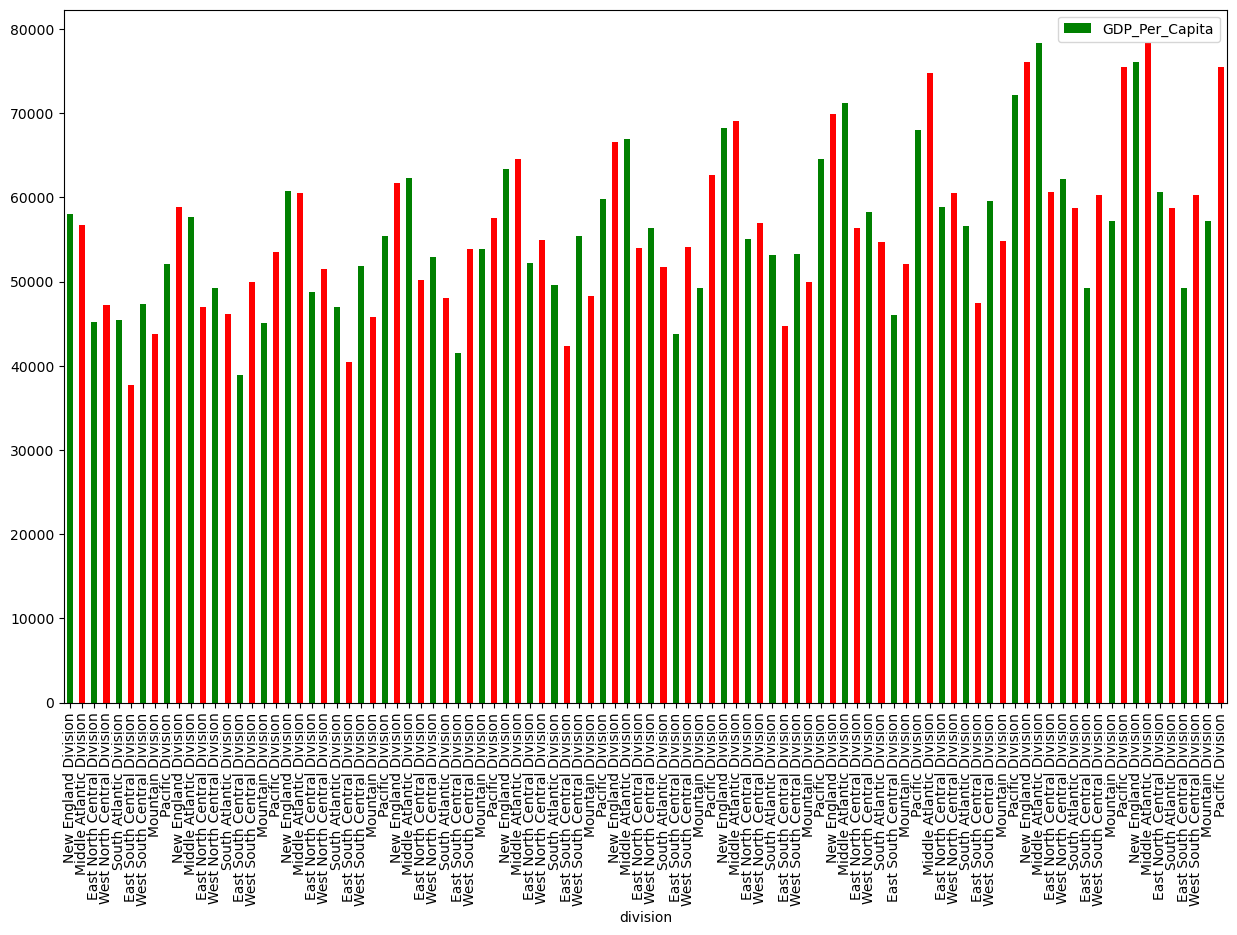

In [38]:

colors = ['green', 'red']
x = ['NE Div', 'MA Div', 'ENC Div', 'WNC Div', 'SA Div', 'ESC Div', 'WSC Div', 'M Div', 'P Div']
df2_div = pd.DataFrame(df2_div, columns=['division', 'DoD_Total', 'GDP_Per_Capita'])

df2_div.plot(x='division', y='GDP_Per_Capita', kind = 'bar', color = colors, figsize = (15,9))
#plt.bar(color=colors)
plt.bar(x,y, width = 0.05)
plt.xticks(rotation = 0)
plt.xlabel('Year')
plt.ylabel('GDPPC ($)')
plt.title('GDPPC ($) by Census Division')
plt.show()      

In [ ]:
#Is GDPPC correlated to Enlisted Accessions

In [28]:
df = pd.read_excel('../data/GDPPC_ENACC_ state_total_10_20.xlsx')

In [29]:
df.head()

,STATE,ST_AB,YEAR,GDP,POP_EST,GDPPC,DoD_TOT_ENSCC_PER
0,Alabama,AL,2010,1.772492e+11,4785514,37038.696366,1.90
1,Alaska,AK,2010,5.333160e+10,713982,74696.000740,0.26
2,Arizona,AZ,2010,2.511530e+11,6407342,39197.689151,2.50
3,Arkansas,AR,2010,1.014865e+11,2921998,34731.885511,1.00
4,California,CA,2010,1.954093e+12,37319550,52361.100281,11.10


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 561 entries, 0 to 560
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   STATE              561 non-null    object 
 1   ST_AB              561 non-null    object 
 2   YEAR               561 non-null    int64  
 3   GDP                561 non-null    float64
 4   POP_EST            561 non-null    int64  
 5   GDPPC              561 non-null    float64
 6   DoD_TOT_ENSCC_PER  561 non-null    float64
dtypes: float64(3), int64(2), object(2)
memory usage: 30.8+ KB


In [32]:
df[df['YEAR'] == 2010]

,STATE,ST_AB,YEAR,GDP,POP_EST,GDPPC,DoD_TOT_ENSCC_PER
0,Alabama,AL,2010,1.772492e+11,4785514,37038.696366,1.90
1,Alaska,AK,2010,5.333160e+10,713982,74696.000740,0.26
2,Arizona,AZ,2010,2.511530e+11,6407342,39197.689151,2.50
3,Arkansas,AR,2010,1.014865e+11,2921998,34731.885511,1.00
4,California,CA,2010,1.954093e+12,37319550,52361.100281,11.10
5,Colorado,CO,2010,2.583002e+11,5047539,51173.492666,1.90
6,Connecticut,CT,2010,2.347000e+11,3579173,65573.807134,0.75
7,Delaware,DE,2010,5.816350e+10,899647,64651.468854,0.24
8,District of Columbia,DC,2010,1.061469e+11,605282,175367.679858,0.07
9,Florida,FL,2010,7.469289e+11,18846143,39632.984850,7.50


In [33]:
df_2010 = df[df['YEAR'] == 2010]
df_2010.head(2)

,STATE,ST_AB,YEAR,GDP,POP_EST,GDPPC,DoD_TOT_ENSCC_PER
0,Alabama,AL,2010,1.772492e+11,4785514,37038.696366,1.90
1,Alaska,AK,2010,5.333160e+10,713982,74696.000740,0.26


In [34]:
df_2010.describe()

,YEAR,GDP,POP_EST,GDPPC,DoD_TOT_ENSCC_PER
count,51.0,5.100000e+01,5.100000e+01,51.000000,51.000000
mean,2010.0,2.930404e+11,6.065238e+06,49710.381054,1.962941
std,0.0,3.552680e+11,6.838046e+06,20142.911521,2.264927
min,2010.0,2.740660e+10,5.645310e+05,31624.124971,0.070000
25%,2010.0,7.574220e+10,1.700205e+06,40770.576515,0.570000
50%,2010.0,1.664087e+11,4.348464e+06,46131.428024,1.300000
75%,2010.0,3.777704e+11,6.654724e+06,52129.791392,2.300000
max,2010.0,1.954093e+12,3.731955e+07,175367.679858,11.100000


In [ ]:
#The aveage GDPPC in the US was approximately $49,710

<Axes: xlabel='YEAR', ylabel='GDPPC'>

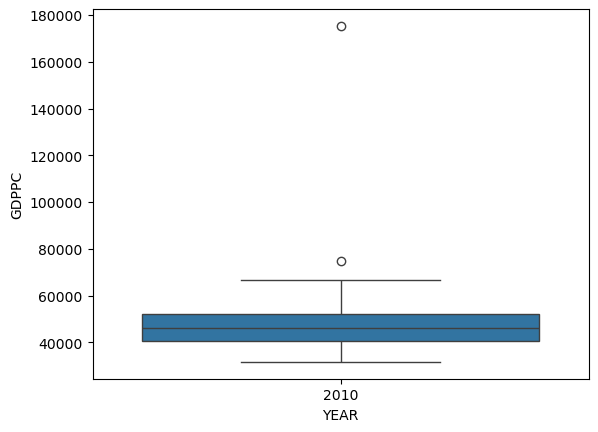

In [35]:
sns.boxplot(x=df_2010['YEAR'], y=df_2010['GDPPC'])

<Axes: xlabel='YEAR', ylabel='GDPPC'>

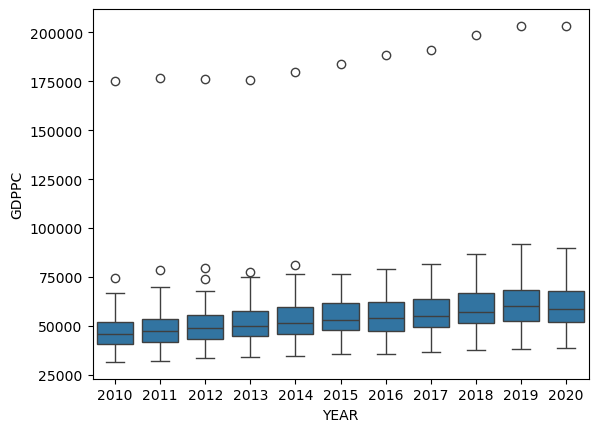

In [36]:
sns.boxplot(x=df['YEAR'], y=df['GDPPC'])

In [ ]:
#https://muskanjindal242.medium.com/gdp-analysis-using-countries-of-the-world-dataset-with-python-a8b45fec0d44

In [37]:
#fig, ax plt.subplots(figsize=(16, 6))
df_2010_gdppc_ordered = df_2010.sort_values('GDPPC', ascending=False)

In [38]:
df_2010_gdppc_ordered

,STATE,ST_AB,YEAR,GDP,POP_EST,GDPPC,DoD_TOT_ENSCC_PER
8,District of Columbia,DC,2010,1.061469e+11,605282,175367.679858,0.07
1,Alaska,AK,2010,5.333160e+10,713982,74696.000740,0.26
50,Wyoming,WY,2010,3.768070e+10,564531,66746.910267,0.26
6,Connecticut,CT,2010,2.347000e+11,3579173,65573.807134,0.75
7,Delaware,DE,2010,5.816350e+10,899647,64651.468854,0.24
32,New York,NY,2010,1.223530e+12,19399956,63068.684279,4.10
21,Massachusetts,MA,2010,4.111361e+11,6566440,62611.719592,1.40
30,New Jersey,NJ,2010,4.927624e+11,8799451,55999.220860,1.90
20,Maryland,MD,2010,3.147283e+11,5788784,54368.637697,1.70
47,Washington,WA,2010,3.654978e+11,6743009,54203.961466,2.30


C:\Users\hargr\AppData\Local\Temp\ipykernel_32384\1861533538.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='ST_AB', y='GDPPC', data=df_2010_gdppc_ordered, palette='Set1')


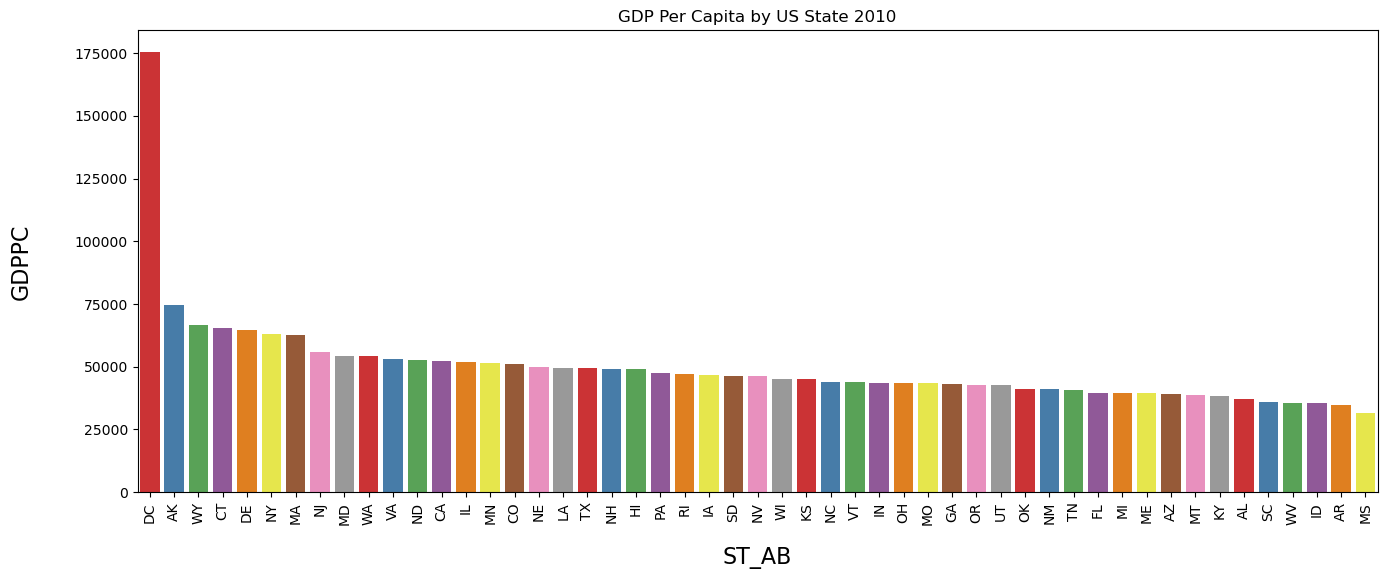

In [48]:
fig, ax = plt.subplots(figsize=(16, 6))
df_2010_gdppc_ordered = df_2010.sort_values('GDPPC', ascending=False)
#mean = pd.DataFrame({'ST_AB':['US mean'], 'GDPPC
sns.barplot(x='ST_AB', y='GDPPC', data=df_2010_gdppc_ordered, palette='Set1')
ax.set_xlabel(ax.get_xlabel(), labelpad=15)
ax.set_ylabel(ax.get_ylabel(), labelpad=30)
ax.xaxis.label.set_fontsize(16)
ax.yaxis.label.set_fontsize(16)
plt.title('GDP Per Capita by US State 2010')
plt.xticks(rotation = 90)   
plt.show()

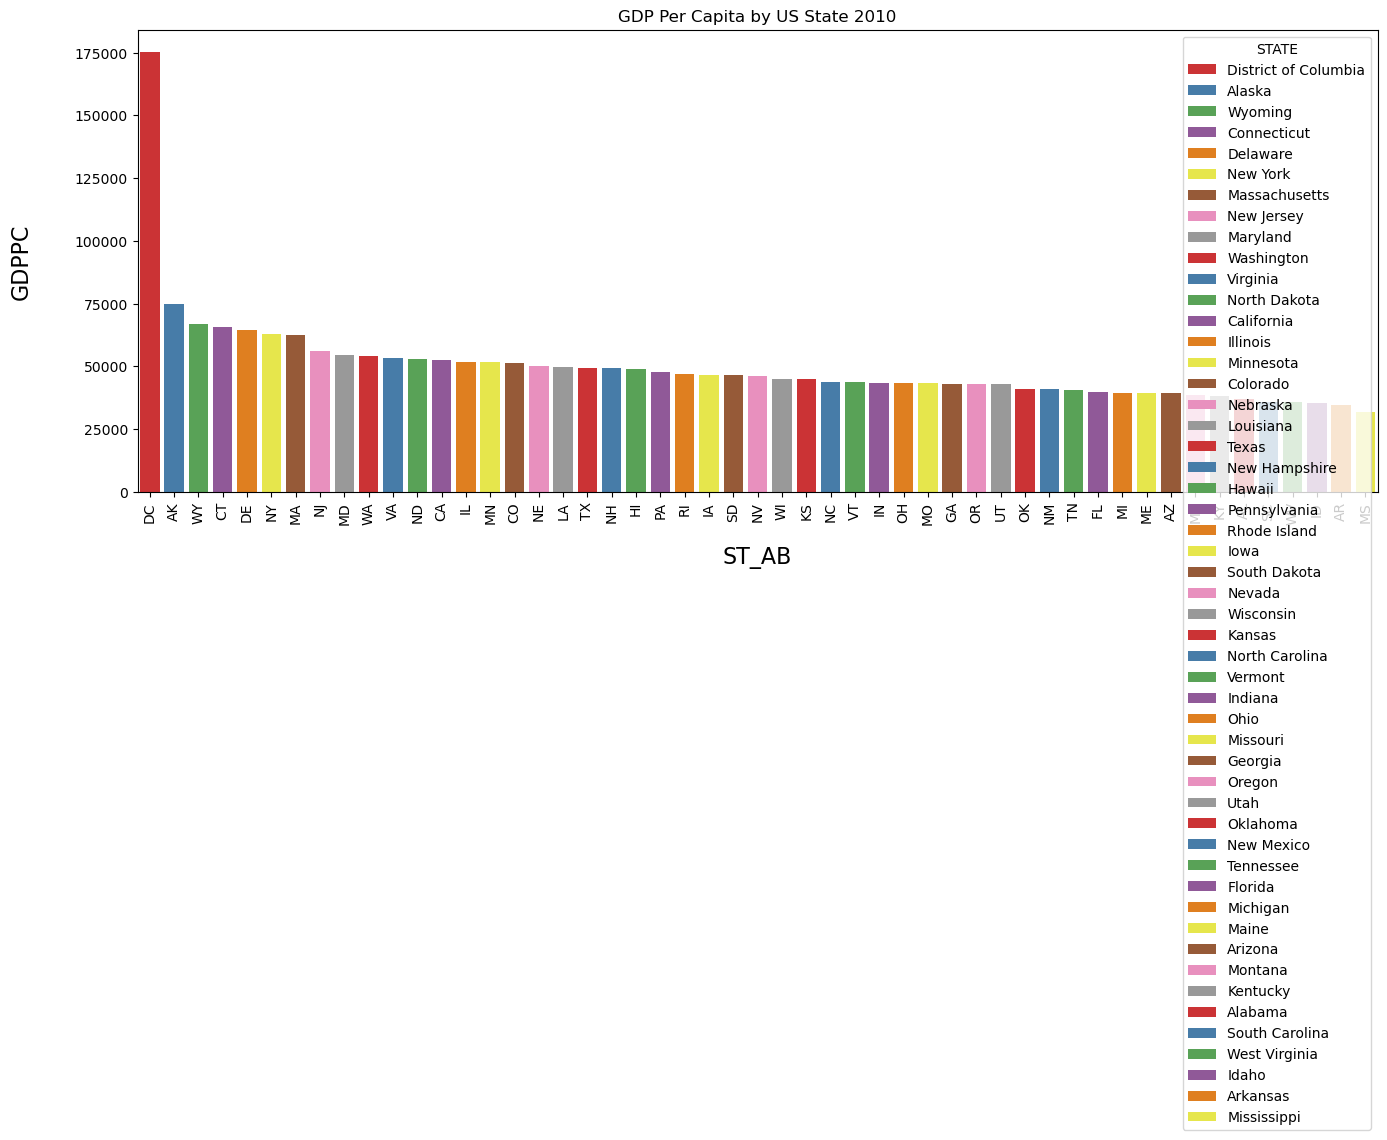

In [49]:
#https://www.geeksforgeeks.org/seaborn-barplot-method-in-python/
fig, ax = plt.subplots(figsize=(16, 6))
df_2010_gdppc_ordered = df_2010.sort_values('GDPPC', ascending=False)
#mean = pd.DataFrame({'ST_AB':['US mean'], 'GDPPC
sns.barplot(x='ST_AB', y='GDPPC', hue='STATE', data=df_2010_gdppc_ordered, palette='Set1')
ax.set_xlabel(ax.get_xlabel(), labelpad=15)
ax.set_ylabel(ax.get_ylabel(), labelpad=30)
ax.xaxis.label.set_fontsize(16)
ax.yaxis.label.set_fontsize(16)
plt.title('GDP Per Capita by US State 2010')
plt.xticks(rotation = 90)   
plt.show()

In [ ]:
#https://seaborn.pydata.org/tutorial/color_palettes.html

C:\Users\hargr\AppData\Local\Temp\ipykernel_32384\3048364073.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='ST_AB', y='GDPPC', data=df_2010_gdppc_ordered, palette='vlag')


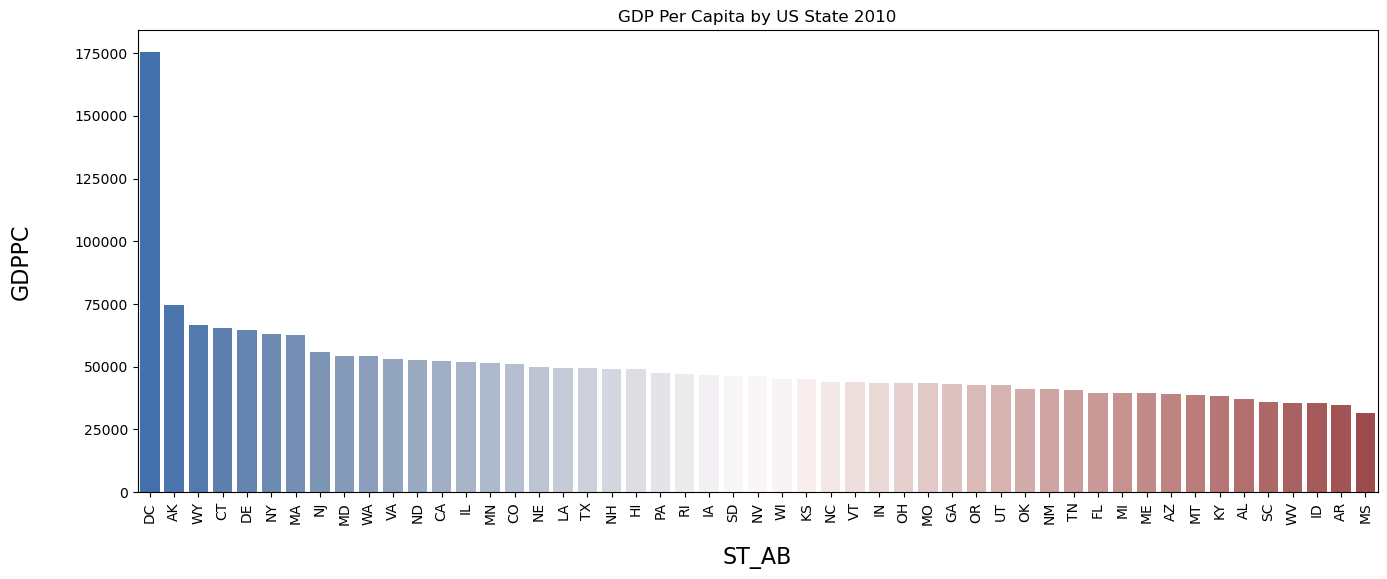

In [54]:
fig, ax = plt.subplots(figsize=(16, 6))
df_2010_gdppc_ordered = df_2010.sort_values('GDPPC', ascending=False)
#mean = pd.DataFrame({'ST_AB':['US mean'], 'GDPPC
sns.barplot(x='ST_AB', y='GDPPC', data=df_2010_gdppc_ordered, palette='vlag')
ax.set_xlabel(ax.get_xlabel(), labelpad=15)
ax.set_ylabel(ax.get_ylabel(), labelpad=30)
ax.xaxis.label.set_fontsize(16)
ax.yaxis.label.set_fontsize(16)
plt.title('GDP Per Capita by US State 2010')
plt.xticks(rotation = 90)   
plt.show()

C:\Users\hargr\AppData\Local\Temp\ipykernel_32384\1964285078.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='ST_AB', y='GDPPC', data=df_2010_gdppc_ordered, palette='coolwarm')


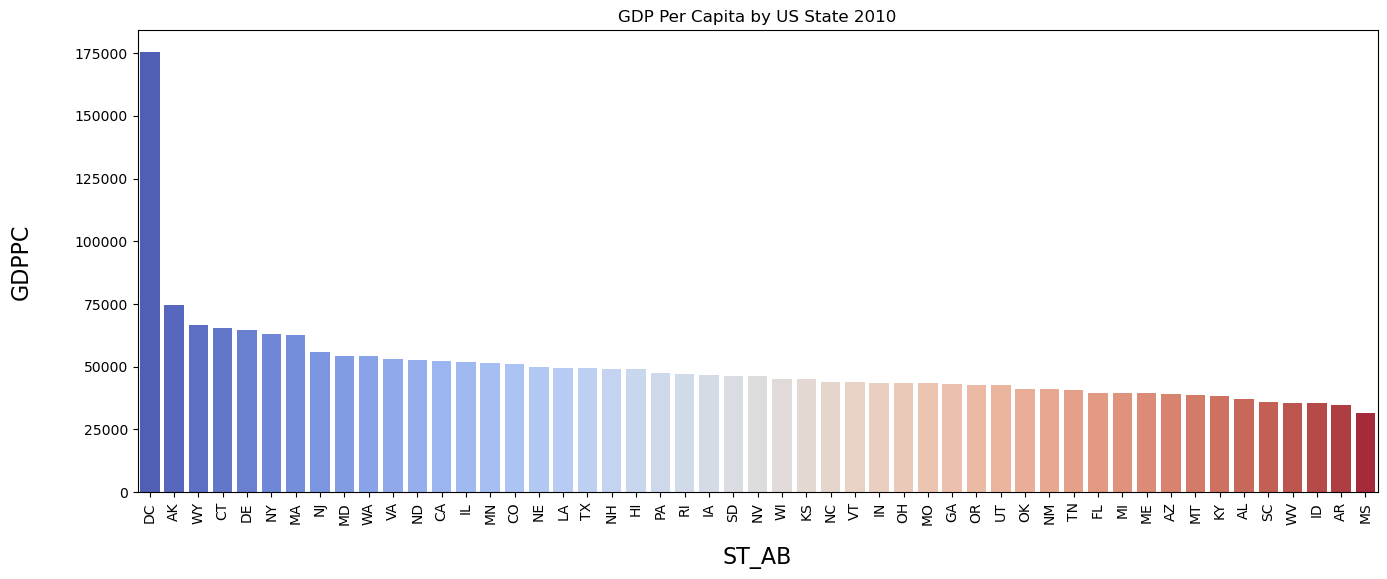

In [55]:
fig, ax = plt.subplots(figsize=(16, 6))
df_2010_gdppc_ordered = df_2010.sort_values('GDPPC', ascending=False)
#mean = pd.DataFrame({'ST_AB':['US mean'], 'GDPPC
sns.barplot(x='ST_AB', y='GDPPC', data=df_2010_gdppc_ordered, palette='coolwarm')
ax.set_xlabel(ax.get_xlabel(), labelpad=15)
ax.set_ylabel(ax.get_ylabel(), labelpad=30)
ax.xaxis.label.set_fontsize(16)
ax.yaxis.label.set_fontsize(16)
plt.title('GDP Per Capita by US State 2010')
plt.xticks(rotation = 90)   
plt.show()

In [ ]:
plt.figure(figsize=(9,9))
sns.heatmap(data=